In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, os.path.abspath('../'))

import gropt

In [2]:
import sys
print(sys.executable)

C:\Users\mloecher\miniconda3\python.exe


Done with func and in .pyx
outsize[0] 151
Done with func and in .pyx set G_return
802.1069449200594
0.0009981522448104796


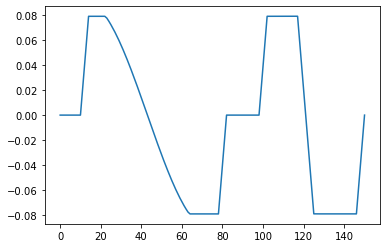

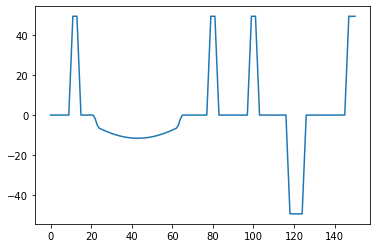

In [4]:
dt = 400e-6
T_90 = 4e-3
T_180 = 6e-3
T_readout = 12e-3 
T_pre = 0e-3
TE = 72.0e-3 
moment_order = 1
gmax = .08
smax = 50
eddy_lam = -60e-3
maxwell_tol = .001

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, 
                  moment_order, gmax, smax, eddy_lam, maxwell_tol, -12)

G = -G

plt.figure()
plt.plot(G)

plt.figure()
plt.plot(np.gradient(G, dt))

from k_utils import get_bval, get_eddy_curves, get_maxwell
print(get_bval(G, dt, TE, T_pre))
print(get_maxwell(G, dt, TE, T_pre))

G_0 = G.copy()
TE_0 = TE

Done with func and in .pyx
outsize[0] 247
Done with func and in .pyx set G_return
476.50777171181596
9.132620015361859e-05


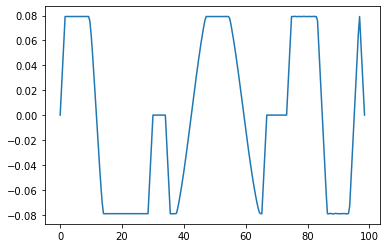

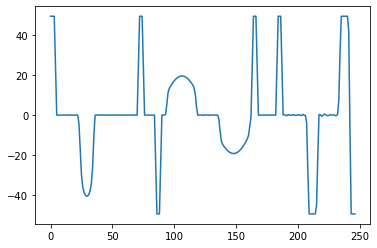

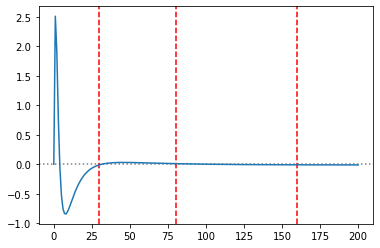

In [15]:
dt = 400e-6
T_90 = 4e-3
T_180 = 6e-3
T_readout = 12e-3 
T_pre = 30e-3
TE = 80.4e-3 
moment_order = 1
gmax = .08
smax = 50
eddy_lam = [160e-3, 80e-3, 30e-3,]
maxwell_tol = .0001

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, 
                  moment_order, gmax, smax, eddy_lam, maxwell_tol, -10)


G = -G

plt.figure()
plt.plot(np.arange(G.size)*dt*1e3, G)

plt.figure()
plt.plot(np.gradient(G, dt))

from k_utils import get_bval, get_eddy_curves, get_maxwell
print(get_bval(G, dt, TE, T_pre))
print(get_maxwell(G, dt, TE, T_pre))

G_1 = G.copy()
TE_1 = TE



plt.figure()
plt.axhline(color='0.5', ls=':')

for lam in eddy_lam:
    plt.axvline(lam*1e3, color='r', ls='--')

all_lam, all_e0, all_e1 = get_eddy_curves(G, dt, 200, 200)
all_e0 = 100*np.array(all_e0)
if all_e0[:10].mean() < 0:
    all_e0 *= -1

plt.plot(all_lam, all_e0)

Done with func and in .pyx
outsize[0] 190
Done with func and in .pyx set G_return
699.8057756437402
8.47740455167667e-07


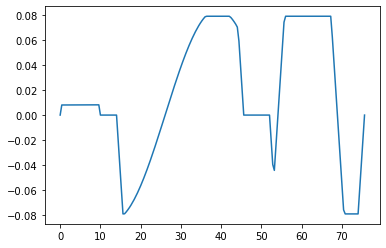

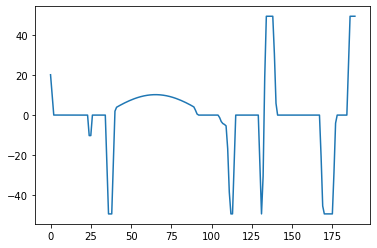

In [8]:
dt = 400e-6
T_90 = 4e-3
T_180 = 6e-3
T_readout = 12e-3 
T_pre = 10e-3
TE = 77.8e-3 
moment_order = 1
gmax = .08
smax = 50
eddy_lam = 10e-3
maxwell_tol = .00001

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, 
                  moment_order, gmax, smax, eddy_lam, maxwell_tol)

plt.figure()
plt.plot(np.arange(G.size)*dt*1e3, G)

plt.figure()
plt.plot(np.gradient(G, dt))

from k_utils import get_bval, get_eddy_curves, get_maxwell
print(get_bval(G, dt, TE, T_pre))
print(get_maxwell(G, dt, TE, T_pre))

G_2 = G.copy()
TE_2 = TE

Done with func and in .pyx
outsize[0] 201
Done with func and in .pyx set G_return
800.6159230161743
0.0009847135036757937


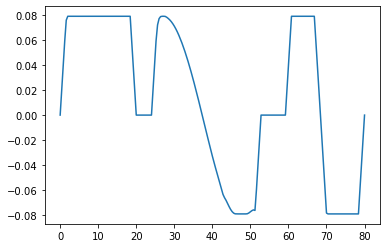

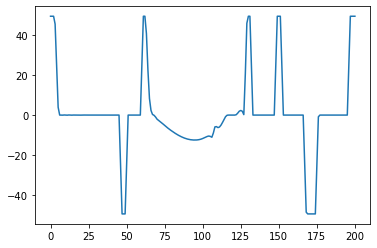

In [9]:
dt = 400e-6
T_90 = 4e-3
T_180 = 6e-3
T_readout = 12e-3 
T_pre = 20e-3
TE = 72.0e-3 
moment_order = 1
gmax = .08
smax = 50
eddy_lam = 60e-3
maxwell_tol = .001

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, 
                  moment_order, gmax, smax, eddy_lam, maxwell_tol)

plt.figure()
plt.plot(np.arange(G.size)*dt*1e3, G)

plt.figure()
plt.plot(np.gradient(G, dt))

from k_utils import get_bval, get_eddy_curves, get_maxwell
print(get_bval(G, dt, TE, T_pre))
print(get_maxwell(G, dt, TE, T_pre))

G_3 = G.copy()
TE_3 = TE

Done with func and in .pyx
outsize[0] 226
Done with func and in .pyx set G_return
546.3051201507294
8.783235115350507e-05


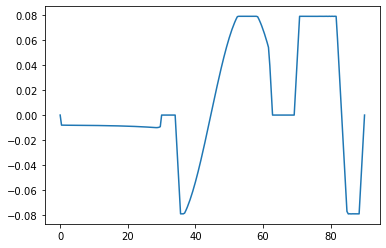

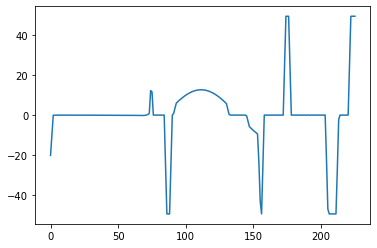

In [11]:
dt = 400e-6
T_90 = 4e-3
T_180 = 6e-3
T_readout = 12e-3 
T_pre = 30e-3
TE = 72.0e-3 
moment_order = 1
gmax = .08
smax = 50
eddy_lam = 10e-3
maxwell_tol = .0001

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, 
                  moment_order, gmax, smax, eddy_lam, maxwell_tol, -12)

G = -G

plt.figure()
plt.plot(np.arange(G.size)*dt*1e3, G)

plt.figure()
plt.plot(np.gradient(G, dt))

from k_utils import get_bval, get_eddy_curves, get_maxwell
print(get_bval(G, dt, TE, T_pre))
print(get_maxwell(G, dt, TE, T_pre))

G_4 = G.copy()
TE_4 = TE

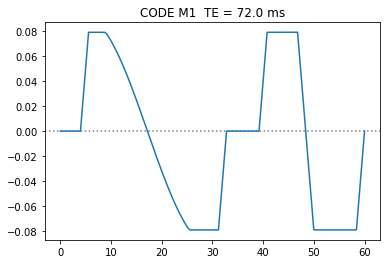

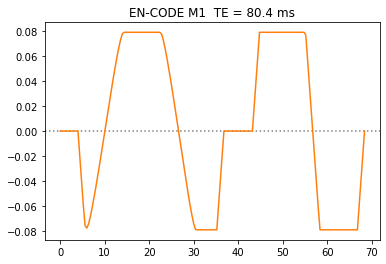

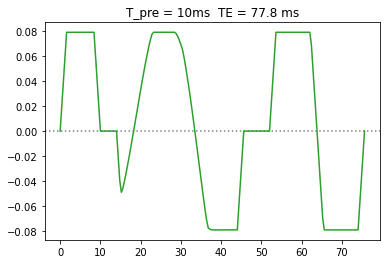

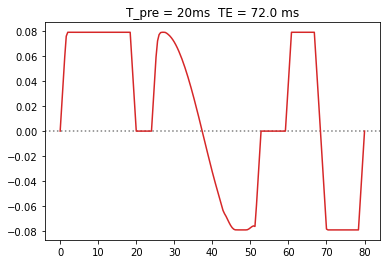

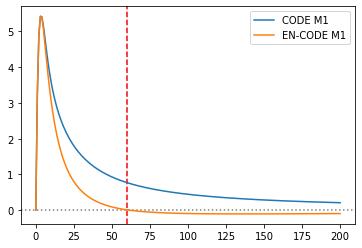

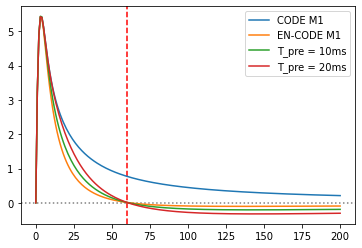

In [31]:
cycler = plt.rcParams['axes.prop_cycle'].by_key()['color']
all_G = [G_0, G_1, G_2, G_3, G_4]
TE = [TE_0, TE_1, TE_2, TE_3, TE_4]
TE = np.array(TE) * 1e3
names = ['CODE M1', 'EN-CODE M1', 'T_pre = 10ms', 'T_pre = 20ms', 'T_pre = 30ms']

for i in range(4):
    plt.figure()
    plt.axhline(color='0.5', ls=':')
    plt.plot(np.arange(all_G[i].size)*dt*1e3, all_G[i], color = cycler[i])
    plt.title('{:}  TE = {:.1f} ms'.format(names[i], TE[i]))
    plt.savefig('max_wave_{:d}.png'.format(i),dpi=300,bbox_inches='tight',facecolor='w', pad_inches=0)
    
    
plt.figure()
plt.axhline(color='0.5', ls=':')
plt.axvline(60, color='r', ls='--')
for i in range(2):
    all_lam, all_e0, all_e1 = get_eddy_curves(all_G[i], dt, 200, 200)
    all_e0 = 100*np.array(all_e0)
    if all_e0[:10].mean() < 0:
        all_e0 *= -1
        
    plt.plot(all_lam, all_e0, color=cycler[i], label = names[i])
    
plt.legend()
    
plt.savefig('max_eddy_2.png',dpi=300,bbox_inches='tight',facecolor='w', pad_inches=0)



plt.figure()
plt.axhline(color='0.5', ls=':')
plt.axvline(60, color='r', ls='--')
for i in range(4):
    all_lam, all_e0, all_e1 = get_eddy_curves(all_G[i], dt, 200, 200)
    all_e0 = 100*np.array(all_e0)
    if all_e0[:10].mean() < 0:
        all_e0 *= -1
        
    plt.plot(all_lam, all_e0, color=cycler[i], label = names[i])
    
plt.legend()
plt.savefig('max_eddy_5.png',dpi=300,bbox_inches='tight',facecolor='w', pad_inches=0)



In [3]:
from k_utils import get_bval, get_eddy_curves, get_maxwell
print(get_bval(G, dt, TE, T_pre))
print(get_maxwell(G, dt, TE, T_pre))

764.1246985892392
0.06292408990630599


In [5]:
get_maxwell(G, dt, TE, T_pre)

TypeError: 'int' object is not subscriptable

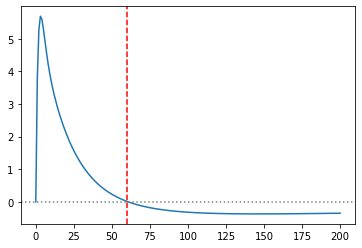

In [61]:
all_lam, all_e0, all_e1 = get_eddy_curves(G, dt, 200, 200)
all_e0 = 100*np.array(all_e0)
if all_e0.mean() < 0:
    all_e0 *= -1
    
plt.figure()
plt.plot(all_lam, all_e0)
plt.axhline(color='0.5', ls=':')
if eddy_lam < 0:
    plt.axvline(-eddy_lam*1e3, color='r', ls='--')
else:
    plt.axvline(eddy_lam*1e3, color='r', ls='--')
    

In [4]:
a = np.array([20,20,20])
b = np.array([3])

bound = 1
norm0 = np.linalg.norm(a)
norm1 = np.linalg.norm(b)
print(norm0, norm1, norm0-norm1)

a2 = a * (norm1+bound)/norm0

print(a2, np.linalg.norm(a2))

34.64101615137755 3.0 31.64101615137755
[2.30940108 2.30940108 2.30940108] 4.0


In [4]:
a = np.array([2,2,2])
b = np.array([400, 400])

bound = 0.01
norm0 = np.linalg.norm(a)
norm1 = np.linalg.norm(b)
print(norm0, norm1, norm0-norm1)

b2 = b * (norm0+bound)/norm1

print(b2, np.linalg.norm(b2))

3.4641016151377544 565.685424949238 -562.2213233341002
[2.45656081 2.45656081] 3.474101615137754
